# Multisample - Fe-Mg equilibrium between olivines and glass. 
- This notebook shows how to assess Fe-Mg equilibrium between olivines and coerupted matrix glasses. 
- In this example, we have multiple samples in the spreadsheet, so first subsample out the rows we want based on sample name. You will  have to change the sample names to reflect whatever column you use for this. Else, see single sample if you only have 1 sample in your spreadsheet
- You can download the spreadsheet here: https://github.com/PennyWieser/Thermobar/tree/main/docs/Examples/Liquid_Ol_Liq_Themometry

### Install Thermobar if you haven't already (remove # and press run)

In [1]:
# !pip install Thermobar

In [117]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Loading a dataset
- This dataset is from Wieser et al. (2021) - https://doi.org/10.1029/2020GC009364
- It shows olivines and glasses from Kilauea from a single sample LL4

## Load in the matrix glasses

In [118]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [119]:
# We dont have to add _Liq as its all liquids, 
# just specify the _Liq in the import
MG_input=pt.import_excel('2022_La_Palma_LM_Glasses_for_Ol_Dis.xlsx',
                         sheet_name='Matrix_Glasses', suffix="_Liq")
MG_all=MG_input['my_input'] ## All columns
MG_Liqs=MG_input['Liqs'] ## Just Liquid columns
MG_Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,43.78395,4.360150,15.06135,12.659990,0.221011,4.617658,11.21765,3.245471,2.097422,0.0,1.082973,0.0,0.0,0.0,0.0,0.0,0
1,43.73590,4.145865,15.16800,12.008230,0.227248,4.605303,10.76470,4.638138,1.930020,0.0,1.119757,0.0,0.0,0.0,0.0,0.0,1
2,44.54150,4.625057,15.45995,13.176590,0.194586,4.552186,11.19158,4.533108,1.224307,0.0,1.130552,0.0,0.0,0.0,0.0,0.0,2
3,46.55701,2.394550,18.49169,9.777098,0.220920,2.357861,11.18517,5.275211,1.881615,0.0,1.157463,0.0,0.0,0.0,0.0,0.0,3
4,45.76684,3.734071,15.95977,11.042310,0.232561,3.779284,8.83004,4.881310,2.555396,0.0,1.391359,0.0,0.0,0.0,0.0,0.0,4


## Load in the olivine data

In [120]:
Ols_in=pt.import_excel('2022_La_Palma_LM_Glasses_for_Ol_Dis.xlsx',
                         sheet_name='MIs_Ols')
Ols_Ol=Ols_in['Ols']
Ols_all=Ols_in['my_input']
Ols_all

,Unnamed: 0,Sample Name,SpecificID,Unnamed: 3,MgO_Ol,SiO2_Ol,FeOt_Ol,Al2O3_Ol,CaO_Ol,MnO_Ol,NiO_Ol
0,1,LM0_G1_CENTER,LM0,0.802323,41.66002,39.98051,18.29631,0.021134,0.213033,0.223041,0.145288
1,2,LM0_G1_CORE1,LM0,0.798801,41.25532,40.03156,18.52279,0.051654,0.338492,0.282764,0.124867
2,3,LM0_G1_CORE2,LM0,0.803641,41.98365,40.19917,18.28553,0.036012,0.160555,0.246299,0.165954
3,4,LM0_G1_RIM,LM0,0.807341,42.12351,39.90642,17.91823,0.018331,0.213926,0.292019,0.190220
4,5,LM0_G2_CENTER,LM0,0.838388,44.42279,39.70696,15.26419,0.008494,0.322745,0.225410,0.194827
...,...,...,...,...,...,...,...,...,...,...,...
210,240,LM6_G8_CENTER1,LM6,0.823786,43.67395,40.20597,16.65279,0.035710,0.196072,0.259278,0.206340
211,241,LM6_G8_CENTER2,LM6,0.825611,43.44088,40.36947,16.35610,0.035780,0.236891,0.252746,0.159243
212,242,LM6_G8_CENTER3,LM6,0.832297,44.16138,36.25420,15.86148,0.032218,0.263133,0.189976,0.215351
213,243,LM6_G8_CORE,LM6,0.826493,43.68600,40.31575,16.34774,0.025383,0.245180,0.278965,0.202737


## Find each sample for matrix glasses Glasses


In [121]:
MGs_LM6_index=MG_all['SpecificID']=="LM6"
MGs_LM4_index=MG_all['SpecificID']=="LM4"
MGs_LM2_index=MG_all['SpecificID']=="LM2"
MGs_LM0_index=MG_all['SpecificID']=="LM0"

## Find each sample for olivines and their melt inclusions

In [122]:
Ols_LM6_index=Ols_all['Sample Name'].str.contains("LM6")
Ols_LM4_index=Ols_all['Sample Name'].str.contains("LM4")
Ols_LM2_index=Ols_all['Sample Name'].str.contains("LM2")
Ols_LM0_index=Ols_all['Sample Name'].str.contains("LM0")

## Workflow 1: Assess if the olivines are in equilibrium with the co-erupted matrix glass

### 1. Calculate Mg# for liquids

In [123]:
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.29)

Liq_Mgno_calc.head()

# Calculate mean value to plot for each sample
Liq_Mgno_calc_mean_LM6=np.mean(Liq_Mgno_calc.loc[MGs_LM6_index])
Liq_Mgno_calc_mean_LM4=np.mean(Liq_Mgno_calc.loc[MGs_LM4_index])
Liq_Mgno_calc_mean_LM2=np.mean(Liq_Mgno_calc.loc[MGs_LM2_index])
Liq_Mgno_calc_mean_LM0=np.mean(Liq_Mgno_calc.loc[MGs_LM0_index])

### 2. Calculate Olivine Fo contents

In [124]:
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=Ols_Ol)

### 3. Calculate fields you want to plot on a Rhodes diagram

In [125]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.2, Max_Mgno=0.8)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352)
0,0.200000,0.454545,0.480769,0.431034,0.423729,0.432526,0.415282
1,0.206061,0.463847,0.490125,0.440243,0.432900,0.441742,0.424406
2,0.212121,0.472973,0.499287,0.449294,0.441919,0.450799,0.433383
3,0.218182,0.481928,0.508259,0.458190,0.450789,0.459700,0.442217
4,0.224242,0.490716,0.517049,0.466936,0.459513,0.468449,0.450912


### 4. Plot the Kd model you want, along with the olivine and glass Mg#

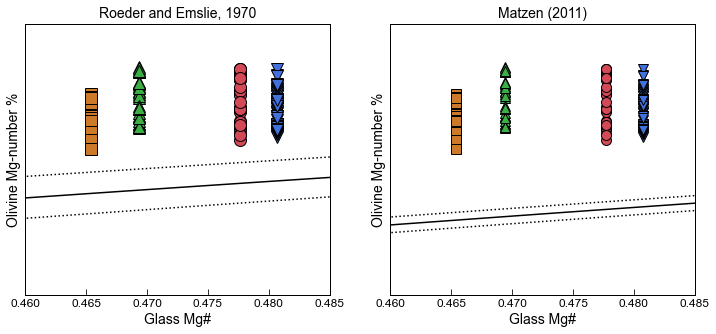

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data

ax1.plot(Ol_Fo_Calc.loc[Ols_LM0_index]*0+Liq_Mgno_calc_mean_LM0,
         Ol_Fo_Calc.loc[Ols_LM0_index], 'o', mfc='#d44958', mec='k', markersize='12',)

ax1.plot(Ol_Fo_Calc.loc[Ols_LM2_index]*0+Liq_Mgno_calc_mean_LM2,
         Ol_Fo_Calc.loc[Ols_LM2_index], '^', 'k', mfc='#3dae46',mec='k',markersize='12',)

ax1.plot(Ol_Fo_Calc.loc[Ols_LM4_index]*0+Liq_Mgno_calc_mean_LM4,
         Ol_Fo_Calc.loc[Ols_LM4_index], 'v', mfc='#4270dd',mec='k',markersize='12',)

ax1.plot(Ol_Fo_Calc.loc[Ols_LM6_index]*0+Liq_Mgno_calc_mean_LM6,
         Ol_Fo_Calc.loc[Ols_LM6_index], 's', mfc='#cc7929',mec='k',markersize='12',)

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(Ol_Fo_Calc.loc[Ols_LM0_index]*0+Liq_Mgno_calc_mean_LM0,
         Ol_Fo_Calc.loc[Ols_LM0_index], 'o', mfc='#d44958', mec='k', markersize='10',)

ax2.plot(Ol_Fo_Calc.loc[Ols_LM2_index]*0+Liq_Mgno_calc_mean_LM2,
         Ol_Fo_Calc.loc[Ols_LM2_index], '^', 'k', mfc='#3dae46',mec='k',markersize='10',)

ax2.plot(Ol_Fo_Calc.loc[Ols_LM4_index]*0+Liq_Mgno_calc_mean_LM4,
         Ol_Fo_Calc.loc[Ols_LM4_index], 'v', mfc='#4270dd',mec='k',markersize='10',)

ax2.plot(Ol_Fo_Calc.loc[Ols_LM6_index]*0+Liq_Mgno_calc_mean_LM6,
         Ol_Fo_Calc.loc[Ols_LM6_index], 's', mfc='#cc7929',mec='k',markersize='10',)

ax1.set_ylabel('Olivine Mg-number %')
ax2.set_ylabel('Olivine Mg-number %')
ax1.set_xlabel('Glass Mg#')
ax2.set_xlabel('Glass Mg#')

# You may need to adjust these limits for your data
ax1.set_ylim([0.65, 0.9])
ax2.set_ylim([0.65, 0.9])
ax1.set_xlim([0.46, 0.485])
ax2.set_xlim([0.46, 0.485])

fig.savefig('ol_liq_JMPcolors.tif', dpi=600)